In [ ]:
import numpy as np
from sklearn.datasets import load_iris

n_classes = 3  # Number of classes

X, y = load_iris(return_X_y = True)
n = X.shape[0]
X = X[:,:2]                 # Keep only the first two features
X = X - np.mean(X, axis=0)  # Center the data


In [ ]:
def init_params(input_dim, hidden_dim, output_dim):
    np.random.seed(0)  # Ensure reproducibility
    W1 = np.random.randn(input_dim, hidden_dim)
    b1 = np.random.randn(hidden_dim)
    W2 = np.random.randn(hidden_dim,output_dim)
    b2 = np.random.randn(output_dim)
    return W1, b1, W2, b2


In [ ]:
input_dim = 2       # Number of input dimension/features
hidden_dim = 10     # Number of hidden neurons
output_dim = 3      # Number of classes

W1, b1, W2, b2 = init_params(input_dim, hidden_dim, output_dim)

theta = {
    "W1": W1,
    "b1": b1,
    "W2": W2,
    "b2": b2
}


In [ ]:
def relu(z):
    return np.maximum(0, z)

def forward(X,theta):
    W1, b1, W2, b2 = theta["W1"], theta["b1"], theta["W2"], theta["b2"]
    h = relu(np.dot(X, W1) + b1)
    z = np.dot(h, W2) + b2
    return h,z


In [ ]:
def relu(z):
    return np.maximum(0, z)

def forward_nonvectorized(X, theta):
    W1, b1, W2, b2 = theta["W1"], theta["b1"], theta["W2"], theta["b2"]
    h = np.zeros((X.shape[0], W1.shape[1]))  # Initialize h
    z = np.zeros((X.shape[0], W2.shape[1]))  # Initialize z

    for i in range(X.shape[0]):
        h[i, :] = relu(np.dot(X[i, :], W1) + b1)
        z[i, :] = np.dot(h[i, :], W2) + b2
    return h, z


# Timing

In [ ]:
import time


X_big = np.vstack([X for i in range(100)])
# Vectorized forward function
start_time = time.time()
h_vec, z_vec = forward(X_big, theta)
end_time = time.time()
print(f"Vectorized time: {end_time - start_time:.5f} seconds")

# Non-vectorized forward function
start_time = time.time()
h_nonvec, z_nonvec = forward_nonvectorized(X_big, theta)
end_time = time.time()
print(f"Non-vectorized time: {end_time - start_time:.5f} seconds")


Vectorized time: 0.02416 seconds
Non-vectorized time: 0.49547 seconds


# softmax computation

In [ ]:
p = np.zeros((n,n_classes))
h,z = forward(X,theta)
for i in range(n):
    p[i,:] = np.exp(z[i,:])/np.sum(np.exp(z[i,:]))

p[:5,:] # sanity check
# should be
# array([[0.0025722 , 0.97505337, 0.02237443],
#        [0.09804607, 0.77617999, 0.12577394],
#        [0.12661246, 0.65719734, 0.21619019],
#        [0.27429138, 0.4847382 , 0.24097042],
#        [0.00291315, 0.96559662, 0.03149023]])


array([[0.0025722 , 0.97505337, 0.02237443],
       [0.09804607, 0.77617999, 0.12577394],
       [0.12661246, 0.65719734, 0.21619019],
       [0.27429138, 0.4847382 , 0.24097042],
       [0.00291315, 0.96559662, 0.03149023]])

# softmax computation (vectorized)

In [ ]:
# your code here
h,z = forward(X,theta)
expz = np.exp(z)

p = expz/ np.sum(expz,axis=-1)[:,np.newaxis] # your code here

p[:5,:] # sanity check

array([[0.0025722 , 0.97505337, 0.02237443],
       [0.09804607, 0.77617999, 0.12577394],
       [0.12661246, 0.65719734, 0.21619019],
       [0.27429138, 0.4847382 , 0.24097042],
       [0.00291315, 0.96559662, 0.03149023]])

# Loss derivative calculation

In [ ]:
loss_der = np.zeros((n,n_classes))
E = np.eye(n_classes)
h,z = forward(X,theta)
for i in range(n):
    loss_der[i,:] = p[i,:] - E[y[i], :]

loss_der[:5,:] # sanity check
# should say
# array([[-0.9974278 ,  0.97505337,  0.02237443],
#        [-0.90195393,  0.77617999,  0.12577394],
#        [-0.87338754,  0.65719734,  0.21619019],
#        [-0.72570862,  0.4847382 ,  0.24097042],
#        [-0.99708685,  0.96559662,  0.03149023]])



array([[-0.9974278 ,  0.97505337,  0.02237443],
       [-0.90195393,  0.77617999,  0.12577394],
       [-0.87338754,  0.65719734,  0.21619019],
       [-0.72570862,  0.4847382 ,  0.24097042],
       [-0.99708685,  0.96559662,  0.03149023]])

# dJdb2 calculation (vectorized)

In [ ]:

# y_one_hot should be a n-by-K tensor where y_one_hot[i,:] is the one-hot vector at y[i]
# should be a 1-liner that does not exceed this many chars ->|          (minus the comment)
# hint 1: "==" is a pairwise operator
# hint 2: use np.arange
# hint 3: broadcast!
y_one_hot = 1*(y[:,np.newaxis] == np.arange(n_classes)) # your code here

loss_der = p - y_one_hot

dJdb2 = np.mean(loss_der,axis=0)


print(dJdb2,"\n")
# should print...
# array([-0.29643435,  0.59559785, -0.2991635 ])
# ... if your answer is correct

loss_der[:5,:] # snaity check


[-0.29643435  0.59559785 -0.2991635 ] 



array([[-0.9974278 ,  0.97505337,  0.02237443],
       [-0.90195393,  0.77617999,  0.12577394],
       [-0.87338754,  0.65719734,  0.21619019],
       [-0.72570862,  0.4847382 ,  0.24097042],
       [-0.99708685,  0.96559662,  0.03149023]])

# dJdW2 calculation

In [ ]:
dJdW2 = np.zeros_like(W2)
# h,z = forward(X,theta) # already computed previously
for i in range(n):
    dJdW2 += np.outer(relu(h[i,:]), loss_der[i,:])

dJdW2 /= n
dJdW2[:3,:] # sanity check
# your first three rows should be
# array([[ 4.78180322e-11,  3.17365767e-02, -3.17365767e-02],
#        [-2.89296255e-01,  5.62840257e-01, -2.73544002e-01],
#        [-1.42266016e-01,  6.53427386e-01, -5.11161370e-01],

array([[ 4.78180322e-11,  3.17365767e-02, -3.17365767e-02],
       [-2.89296255e-01,  5.62840257e-01, -2.73544002e-01],
       [-1.42266016e-01,  6.53427386e-01, -5.11161370e-01]])

# dJdW2 calculation (vectorized)

In [ ]:

dJdW2 = np.matmul(relu(h).T, loss_der)/n   # your code here
dJdW2[:3,] # sanity check

array([[ 4.78180322e-11,  3.17365767e-02, -3.17365767e-02],
       [-2.89296255e-01,  5.62840257e-01, -2.73544002e-01],
       [-1.42266016e-01,  6.53427386e-01, -5.11161370e-01]])

# dJdb1 calculation

In [ ]:
def relu_derivative(z):
    return 1.0*(z > 0)

dJdb1 = np.zeros_like(b1)

# h,z = forward(X,theta)
for i in range(n):
    dJdb1 += (W2@(loss_der[i,:])) * relu_derivative(h[i,:])
dJdb1 /=n
dJdb1
# should be
# array([ 5.90775856e-02,  3.33066422e-01,  5.00043538e-01,  9.65803254e-02,
        # 1.74727058e+00, -1.54422652e-03,  3.68069930e-01, -1.10518462e-02,
        # 2.43568198e-01, -3.58945020e-01])

array([ 5.90775856e-02,  3.33066422e-01,  5.00043538e-01,  9.65803254e-02,
        1.74727058e+00, -1.54422652e-03,  3.68069930e-01, -1.10518462e-02,
        2.43568198e-01, -3.58945020e-01])

# dJdb1 calculation (vectorized)

In [ ]:
dJdb1 = np.mean((loss_der@W2.T) * relu_derivative(h), axis = 0) # your code here
dJdb1

array([ 5.90775856e-02,  3.33066422e-01,  5.00043538e-01,  9.65803254e-02,
        1.74727058e+00, -1.54422652e-03,  3.68069930e-01, -1.10518462e-02,
        2.43568198e-01, -3.58945020e-01])

# dJdW1 calculation

In [ ]:
dJdW1 = np.zeros_like(W1)

# h,z = forward(X,theta)
for i in range(n):
    dJdW1 += np.outer((W2@loss_der[i,:])  *
                      relu_derivative(h[i,:]), X[i,:]).T
dJdW1 /=n
dJdW1
# should be
# array([[ 1.07999453e-01, -5.09697354e-01,  4.20123306e-01,
#          9.36336787e-02, -6.47689038e-02,  2.30465388e-03,
#          7.38056259e-02,  2.24393341e-02, -5.33412589e-03,
#          1.45179361e-01],
#        [ 3.36460923e-03,  2.20529616e-01, -4.57539715e-02,
#         -8.32287862e-04,  4.33449051e-01, -6.86691098e-05,
#          1.32692205e-01, -5.30041434e-03,  5.17620420e-02,
#         -1.19088483e-01]])

array([[ 1.07999453e-01, -5.09697354e-01,  4.20123306e-01,
         9.36336787e-02, -6.47689038e-02,  2.30465388e-03,
         7.38056259e-02,  2.24393341e-02, -5.33412589e-03,
         1.45179361e-01],
       [ 3.36460923e-03,  2.20529616e-01, -4.57539715e-02,
        -8.32287862e-04,  4.33449051e-01, -6.86691098e-05,
         1.32692205e-01, -5.30041434e-03,  5.17620420e-02,
        -1.19088483e-01]])

# dJdW1 calculation (vectorized)

In [ ]:
# hint: use the same trick for expressing sum of outer products as a matmul
# hint: you can use 2 lines
G = (loss_der@W2.T) * relu_derivative(h) # your code here
dJdW1 = np.matmul(G.T, X).T/n   # your code here
dJdW1

array([[ 1.07999453e-01, -5.09697354e-01,  4.20123306e-01,
         9.36336787e-02, -6.47689038e-02,  2.30465388e-03,
         7.38056259e-02,  2.24393341e-02, -5.33412589e-03,
         1.45179361e-01],
       [ 3.36460923e-03,  2.20529616e-01, -4.57539715e-02,
        -8.32287862e-04,  4.33449051e-01, -6.86691098e-05,
         1.32692205e-01, -5.30041434e-03,  5.17620420e-02,
        -1.19088483e-01]])

# `compute_gradient` from last time

In [ ]:

# def compute_gradients(X,y,theta):
#     dJdW1 = np.zeros_like(W1)
#     dJdb1 = np.zeros_like(b1)
#     dJdW2 = np.zeros_like(W2)
#     dJdb2 = np.zeros_like(b2)
#     h, z = forward(X, theta)
#     for i in range(n):
#         p = np.exp(z[i,:])/np.sum(np.exp(z[i,:]))
#         loss_der = p - E[y[i], :]
#         dJdW1 += np.outer((W2@loss_der) * relu_derivative(h[i,:]), X[i,:]).T
#         dJdb1 += (W2@(loss_der)) * relu_derivative(h[i,:])
#         dJdW2 += np.outer(relu(h[i,:]), loss_der)
#         dJdb2 += loss_der
#     dJdW1 /=n
#     dJdb1 /=n
#     dJdW2 /=n
#     dJdb2 /=n

#     gradients = {
#         "W1": dJdW1,
#         "b1": dJdb1,
#         "W2": dJdW2,
#         "b2": dJdb2
#     }

#     return gradients

# vectorize the `compute_gradient` function from last time
should not use any for loop in the function

In [ ]:

def compute_gradients(X,y,theta):
    W1, b1, W2, b2 = theta["W1"], theta["b1"], theta["W2"], theta["b2"]

    dJdW1 = np.zeros_like(W1)
    dJdb1 = np.zeros_like(b1)
    dJdW2 = np.zeros_like(W2)
    dJdb2 = np.zeros_like(b2)
    h, z = forward(X, theta)
    expz = np.exp(z)

    p = expz/ np.sum(expz,axis=-1)[:,np.newaxis] # your code here

    y_one_hot = 1*(y[:,np.newaxis] == np.arange(n_classes)) # your code here

    loss_der = p - y_one_hot

    dJdb2 = np.mean(loss_der,axis=0)

    dJdW2 = np.matmul(relu(h).T, loss_der)/n   # your code here


    dJdb1 = np.mean((loss_der@W2.T) * relu_derivative(h), axis = 0) # your code here

    G = (loss_der@W2.T) * relu_derivative(h) # your code here
    dJdW1 = np.matmul(G.T, X).T/n   # your code here


    gradients = {
        "W1": dJdW1,
        "b1": dJdb1,
        "W2": dJdW2,
        "b2": dJdb2
    }

    return gradients

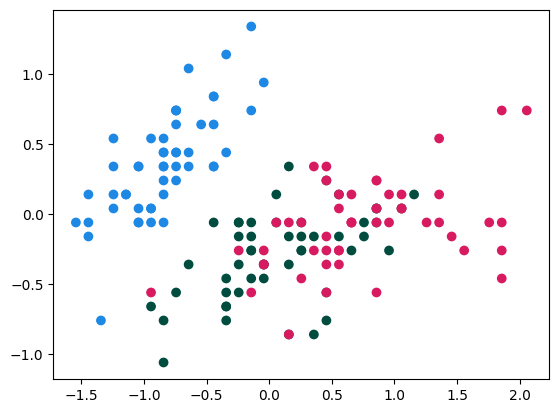

In [ ]:
import matplotlib.pyplot as plt
mycolorpalette = ['#1E88E5','#004D40','#D81B60']
mycolor = lambda labels: [ mycolorpalette[label] for label in labels]
plt.scatter(X[:,0], X[:,1], c=mycolor(y))

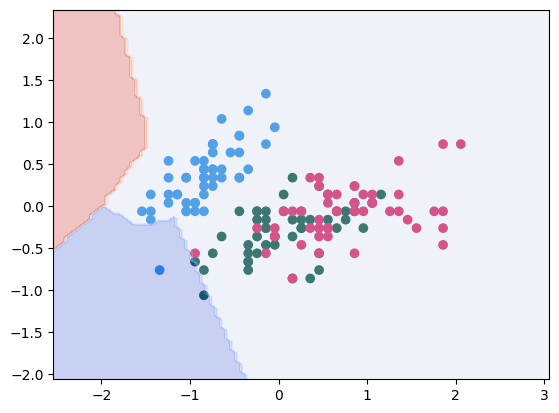

In [ ]:
theta_list = [theta]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))

# Flatten the grid arrays and stack them to form the input data points
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Perform forward pass and compute predicted labels
logits = forward( grid_points, theta_list[-1])[1]
grid_predictions = np.argmax(logits, axis=1).reshape(xx.shape)



plt.scatter(X[:,0], X[:,1], c=mycolor(y))

plt.gca().contourf(xx, yy, grid_predictions, cmap='coolwarm', alpha=0.3)

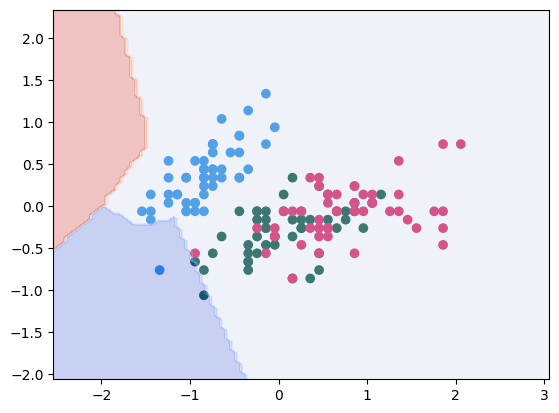

In [ ]:
logits = forward( grid_points, theta_list[-1])[1]
grid_predictions = np.argmax(logits, axis=1).reshape(xx.shape)



plt.scatter(X[:,0], X[:,1], c=mycolor(y))

plt.gca().contourf(xx, yy, grid_predictions, cmap='coolwarm', alpha=0.3)

In [ ]:
import time
start_time = time.time()

step_size = 0.01
for i in range(1000):
    theta = theta_list[-1]
    theta_grad = compute_gradients(X,y,theta)
    theta['W1'] -= step_size*theta_grad['W1']
    theta['b1'] -= step_size*theta_grad['b1']
    theta['W2'] -= step_size*theta_grad['W2']
    theta['b2'] -= step_size*theta_grad['b2']
    theta_list.append(theta)

end_time = time.time()
print(f"Non-vectorized time: {end_time - start_time:.5f} seconds")


Non-vectorized time: 0.41911 seconds


In [ ]:
theta_list[-1]

{'W1': array([[ 1.57163481,  1.20691007,  0.14533909,  2.29128846,  1.69421028,
         -0.97167661,  0.95774684, -0.15729728, -0.18029144,  0.53526142],
        [ 0.13550107,  0.89359891,  1.24139784,  0.12701307, -0.9663592 ,
          0.33376289,  1.23421801, -0.14861617,  0.47927602, -0.21833979]]),
 'b1': array([-2.65666363,  0.41013083,  0.95870078, -0.65912424,  1.81860246,
        -1.45803446, -0.32968334, -0.22614685,  1.53854905,  1.65821791]),
 'W2': array([[ 0.15493283,  0.33555695, -0.84516559],
        [-1.59046286, -1.02945158,  0.4475548 ],
        [ 1.74991403,  0.46499635, -0.16956667],
        [-0.31565445, -1.55113861, -0.90408059],
        [-1.93129074,  1.09692845,  0.56921531],
        [-0.43774996, -1.25294696,  0.77731761],
        [-1.41908313, -0.62230094, -0.68072062],
        [ 0.38291258, -0.50308455, -1.18436285],
        [ 0.57178564,  0.07449354, -0.17961231],
        [ 0.23244417, -0.7561208 , -0.17091474]]),
 'b2': array([-0.43683896, -0.49850824, -0

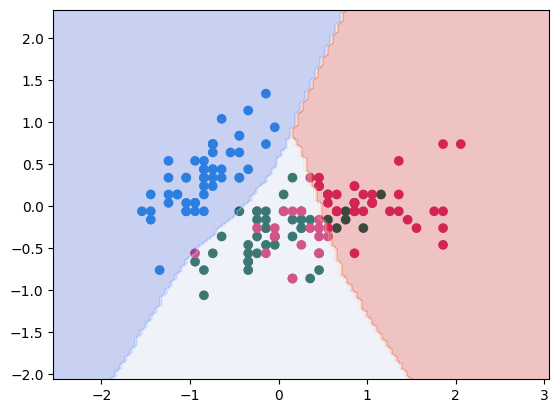

In [ ]:
logits = forward( grid_points, theta_list[-1])[1]
grid_predictions = np.argmax(logits, axis=1).reshape(xx.shape)



plt.scatter(X[:,0], X[:,1], c=mycolor(y))

plt.gca().contourf(xx, yy, grid_predictions, cmap='coolwarm', alpha=0.3)